In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif
%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('bankrupt.csv')

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.shape

(6819, 96)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Présence d'un espace devant le nom des features

In [6]:
df.columns= [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]

# Analyse de forme

NumExpr defaulting to 8 threads.


<AxesSubplot:ylabel='None'>

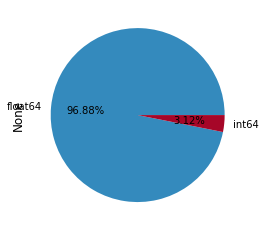

In [7]:
df.dtypes.value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

In [8]:
df.duplicated().sum()

0

Forme des données : 6819 lignes sur 95 Features  
Pas de données manquantes  
Pas de doublons  

type des variables: float64 
Target : df[Bankrupt?]  
        97% ==> 0  
        3%  ==> 1  
Target is unbalanced

In [9]:
{column: len(df[column].unique())for column in df.columns}

{'Bankrupt?': 2,
 'ROA(C) before interest and depreciation before interest': 3333,
 'ROA(A) before interest and % after tax': 3151,
 'ROA(B) before interest and depreciation after tax': 3160,
 'Operating Gross Margin': 3781,
 'Realized Sales Gross Margin': 3788,
 'Operating Profit Rate': 3376,
 'Pre-tax net Interest Rate': 3789,
 'After-tax net Interest Rate': 3604,
 'Non-industry income and expenditure/revenue': 2551,
 'Continuous interest rate (after tax)': 3617,
 'Operating Expense Rate': 2966,
 'Research and development expense rate': 1536,
 'Cash flow rate': 5557,
 'Interest-bearing debt interest rate': 1080,
 'Tax rate (A)': 2488,
 'Net Value Per Share (B)': 2278,
 'Net Value Per Share (A)': 2285,
 'Net Value Per Share (C)': 2284,
 'Persistent EPS in the Last Four Seasons': 1358,
 'Cash Flow Per Share': 1545,
 'Revenue Per Share (Yuan ¥)': 3807,
 'Operating Profit Per Share (Yuan ¥)': 1236,
 'Per Share Net profit before tax (Yuan ¥)': 1522,
 'Realized Sales Gross Profit Growth Ra

The features Net Income Flag and Liability-Assets Flag is absolutely useless.

In [10]:
df=df.drop(['Net Income Flag','Liability-Assets Flag'],axis=1)

# Analyse de fond:

## Analyse de la target

0    96.77372
1     3.22628
Name: Bankrupt?, dtype: float64


C:\Users\mattb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


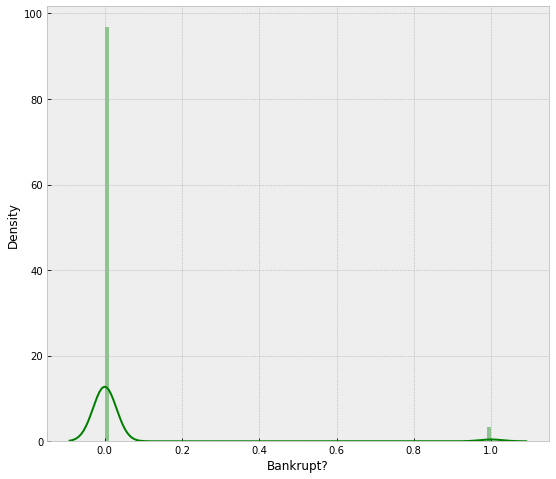

In [11]:
print(df['Bankrupt?'].value_counts()/6819*100)
plt.figure(figsize=(9, 8))
sns.distplot(df['Bankrupt?'], color='g', bins=100, hist_kws={'alpha': 0.4});

# Correlation avec la target

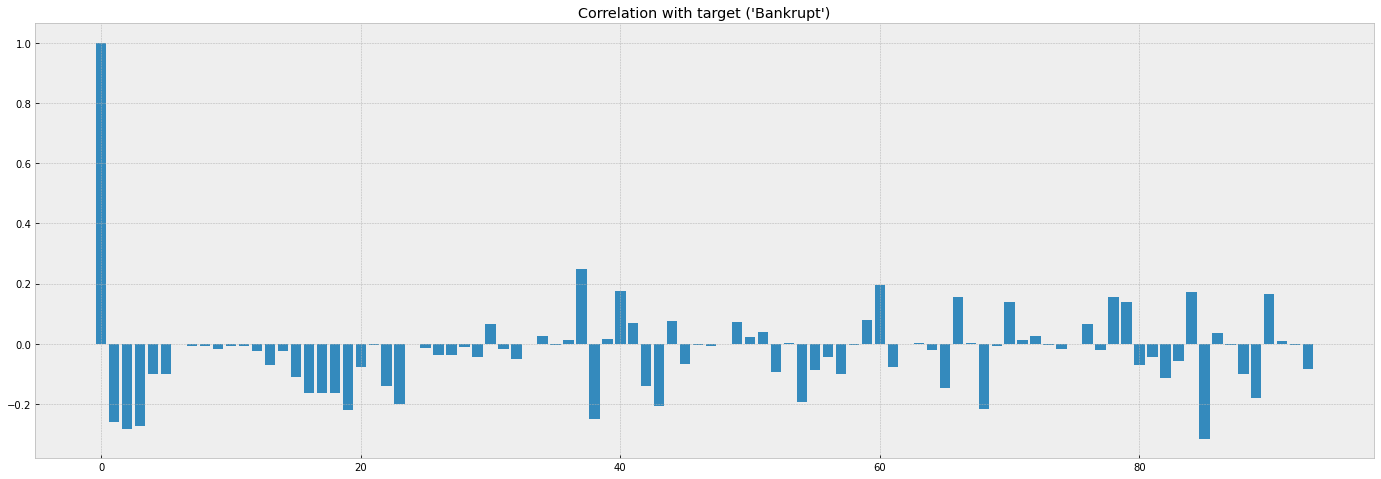

In [12]:
m, n = df.shape
mean = df.mean().values             # Mean value for each column
std  = df.std().values * np.sqrt(m) # Std values for each column (* num samples)
corr = ((df.values - mean) * (df.values[:,0] - mean[0]).reshape(m, 1)).sum(axis=0) / (std * std[0])

fig, corr_ax = plt.subplots(figsize=(24, 8))
corr_ax.bar(x=np.arange(len(df.columns)), height=corr)
corr_ax.set_title("Correlation with target ('Bankrupt')")

plt.show()

In [47]:
df_corr = df.corr()['Bankrupt?'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.15].sort_values(ascending=False)
print("Il y a {}  variables corrélés à 0.15% avec la cible:\n{}".format(len(golden_features_list), golden_features_list))

Il y a 22  variables corrélés à 0.15% avec la cible:
Bankrupt?                                                  1.000000
Debt ratio %                                               0.250161
Current Liability to Assets                                0.194494
Borrowing dependency                                       0.176543
Current Liability to Current Assets                        0.171306
Liability to Equity                                        0.166812
Current Liabilities/Equity                                 0.153828
Current Liability to Equity                                0.153828
Net Value Per Share (C)                                   -0.164784
Net Value Per Share (B)                                   -0.165399
Net Value Per Share (A)                                   -0.165465
Net Income to Stockholder's Equity                        -0.180987
Working Capital to Total Assets                           -0.193083
Per Share Net profit before tax (Yuan ¥)                  -0.20

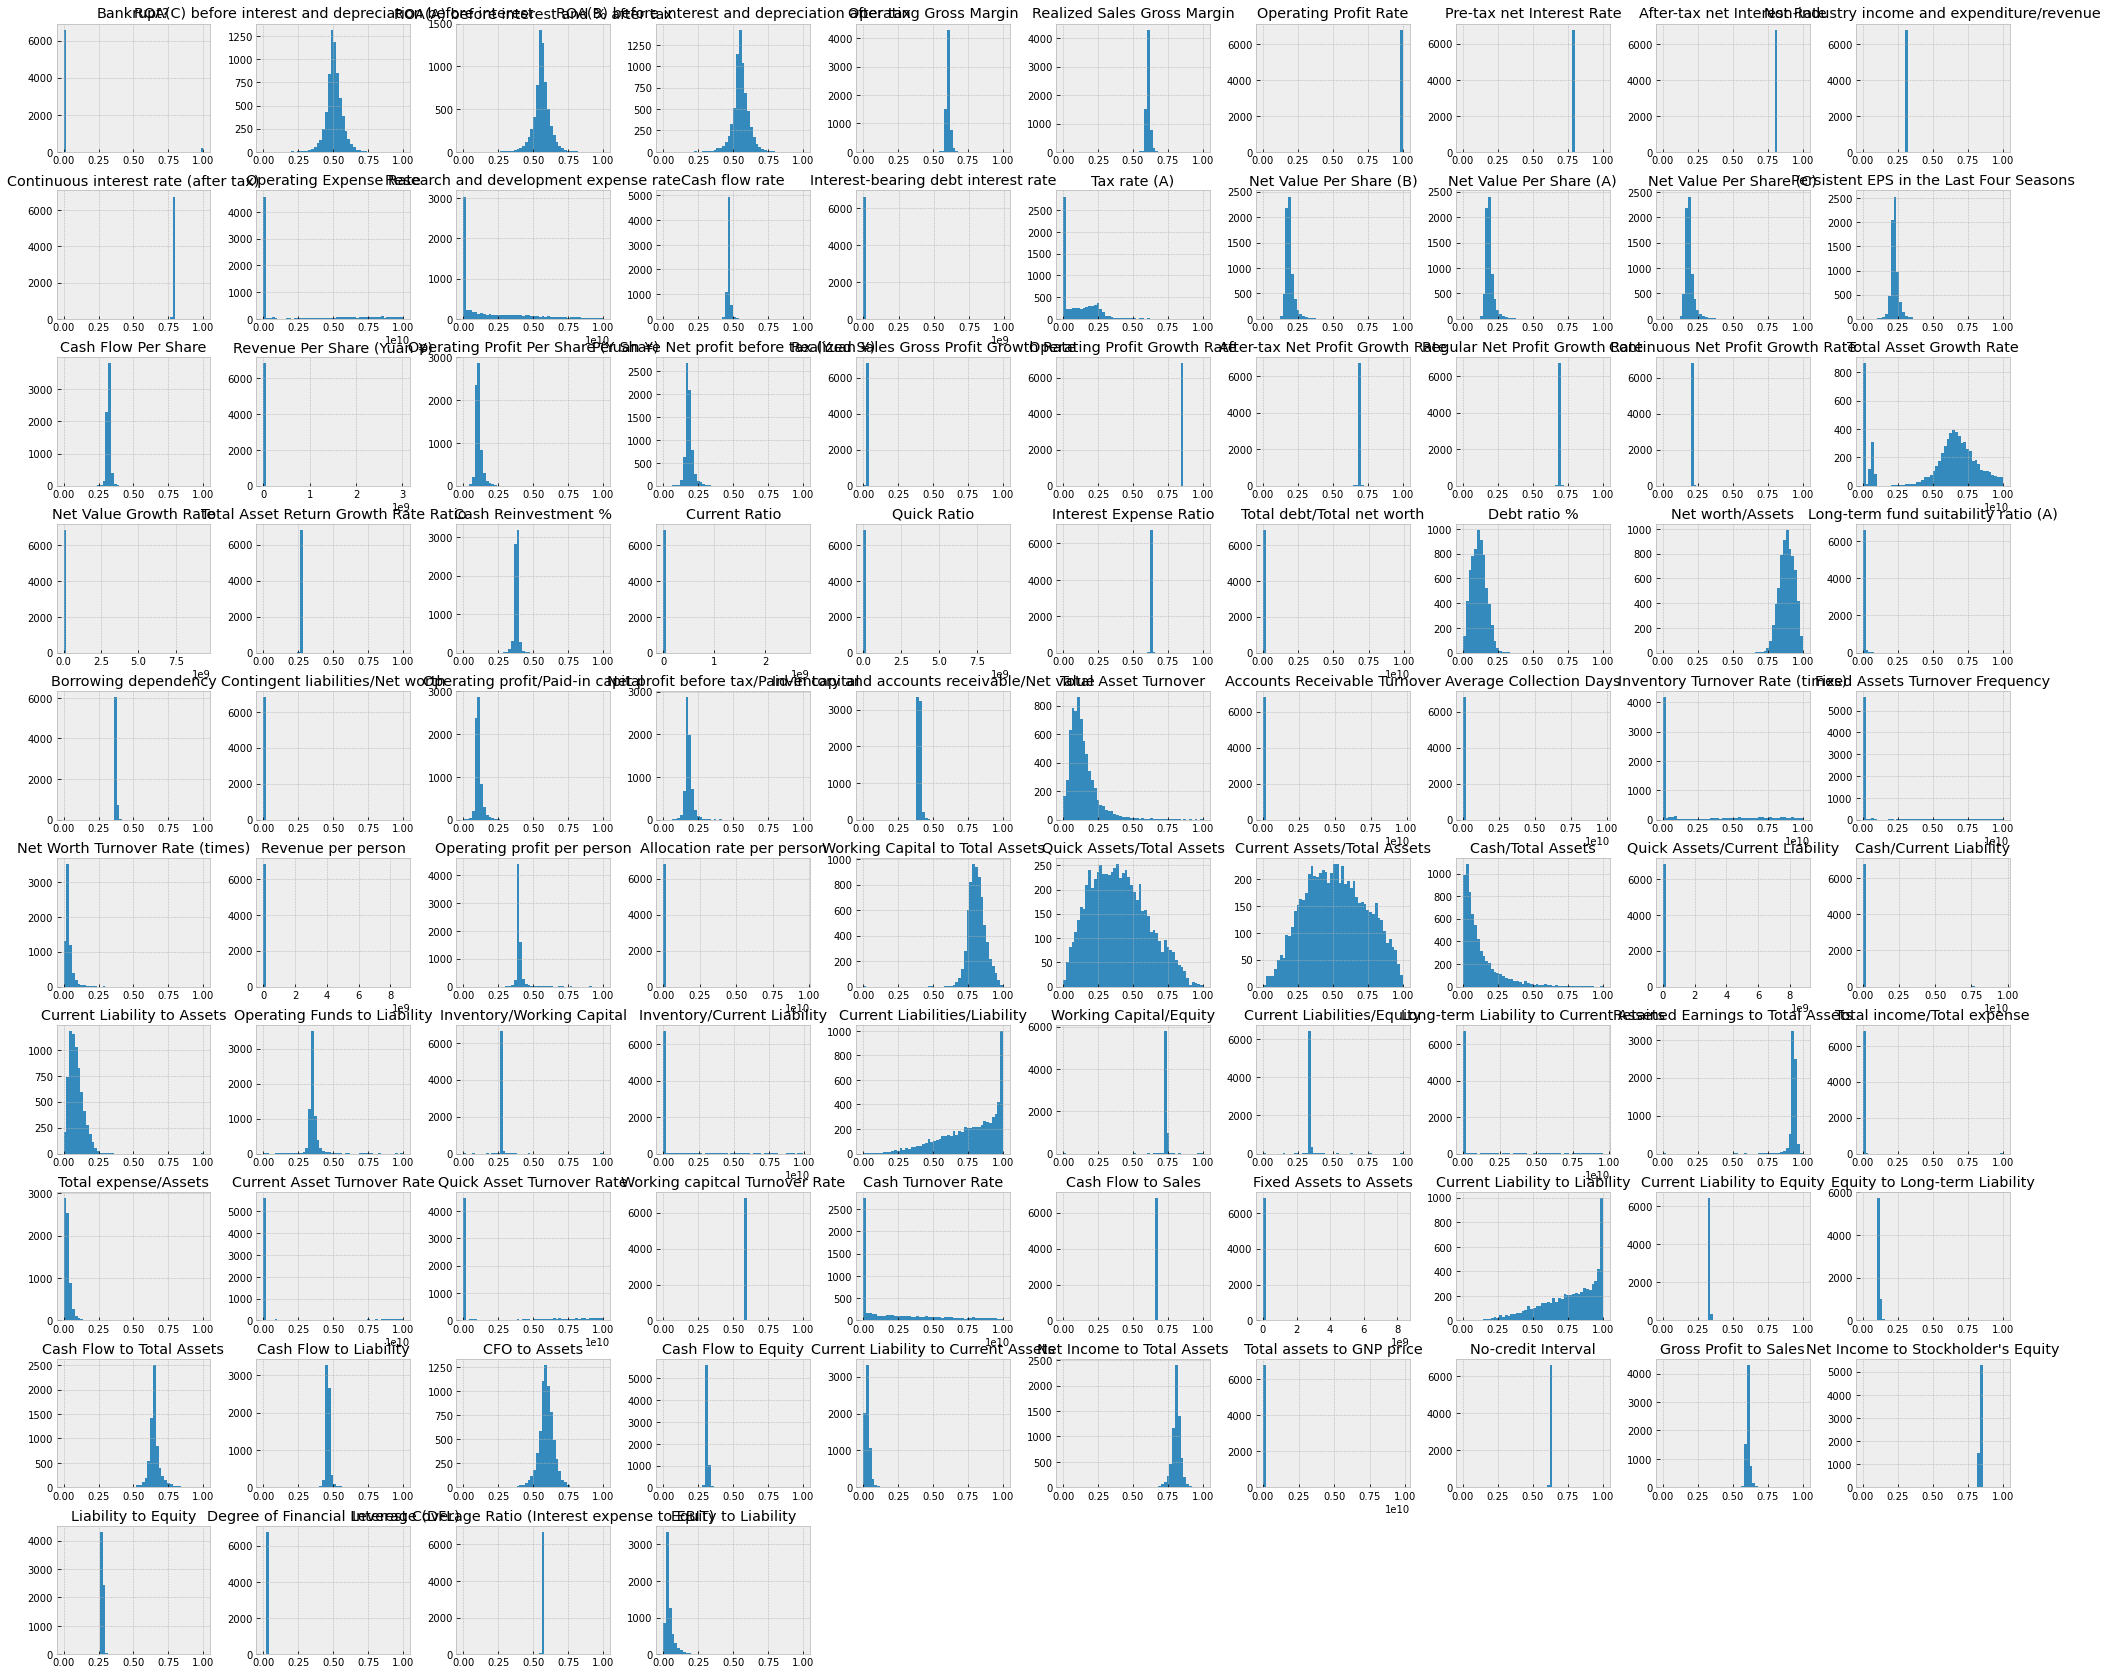

In [14]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

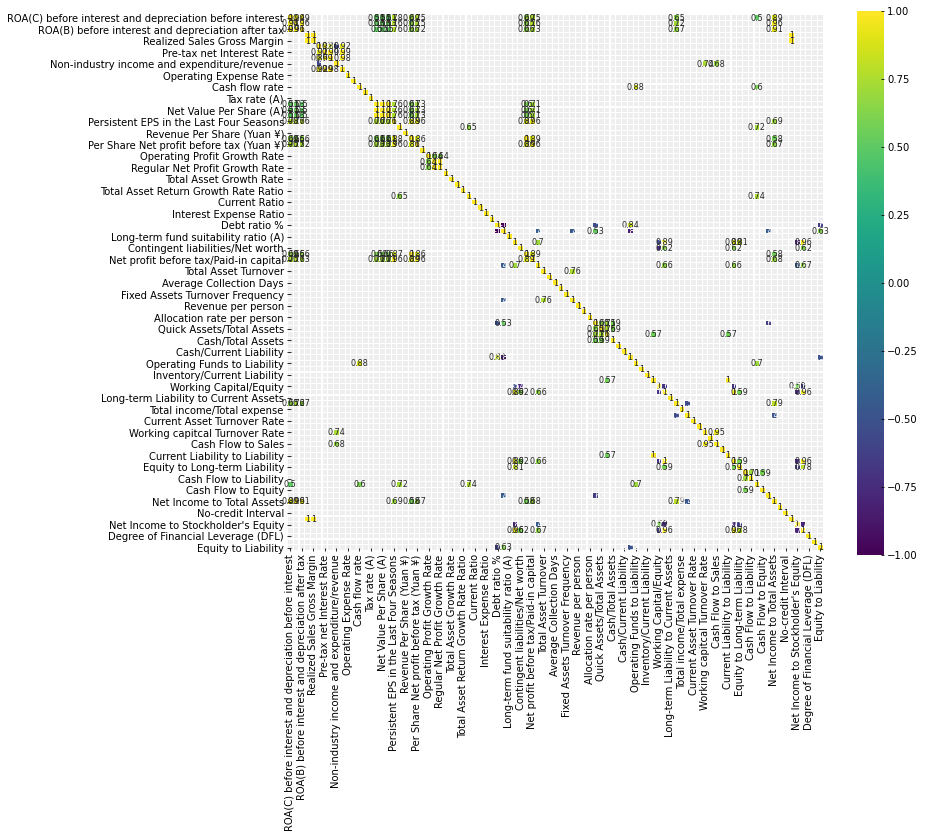

In [15]:
corr = df.drop('Bankrupt?', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

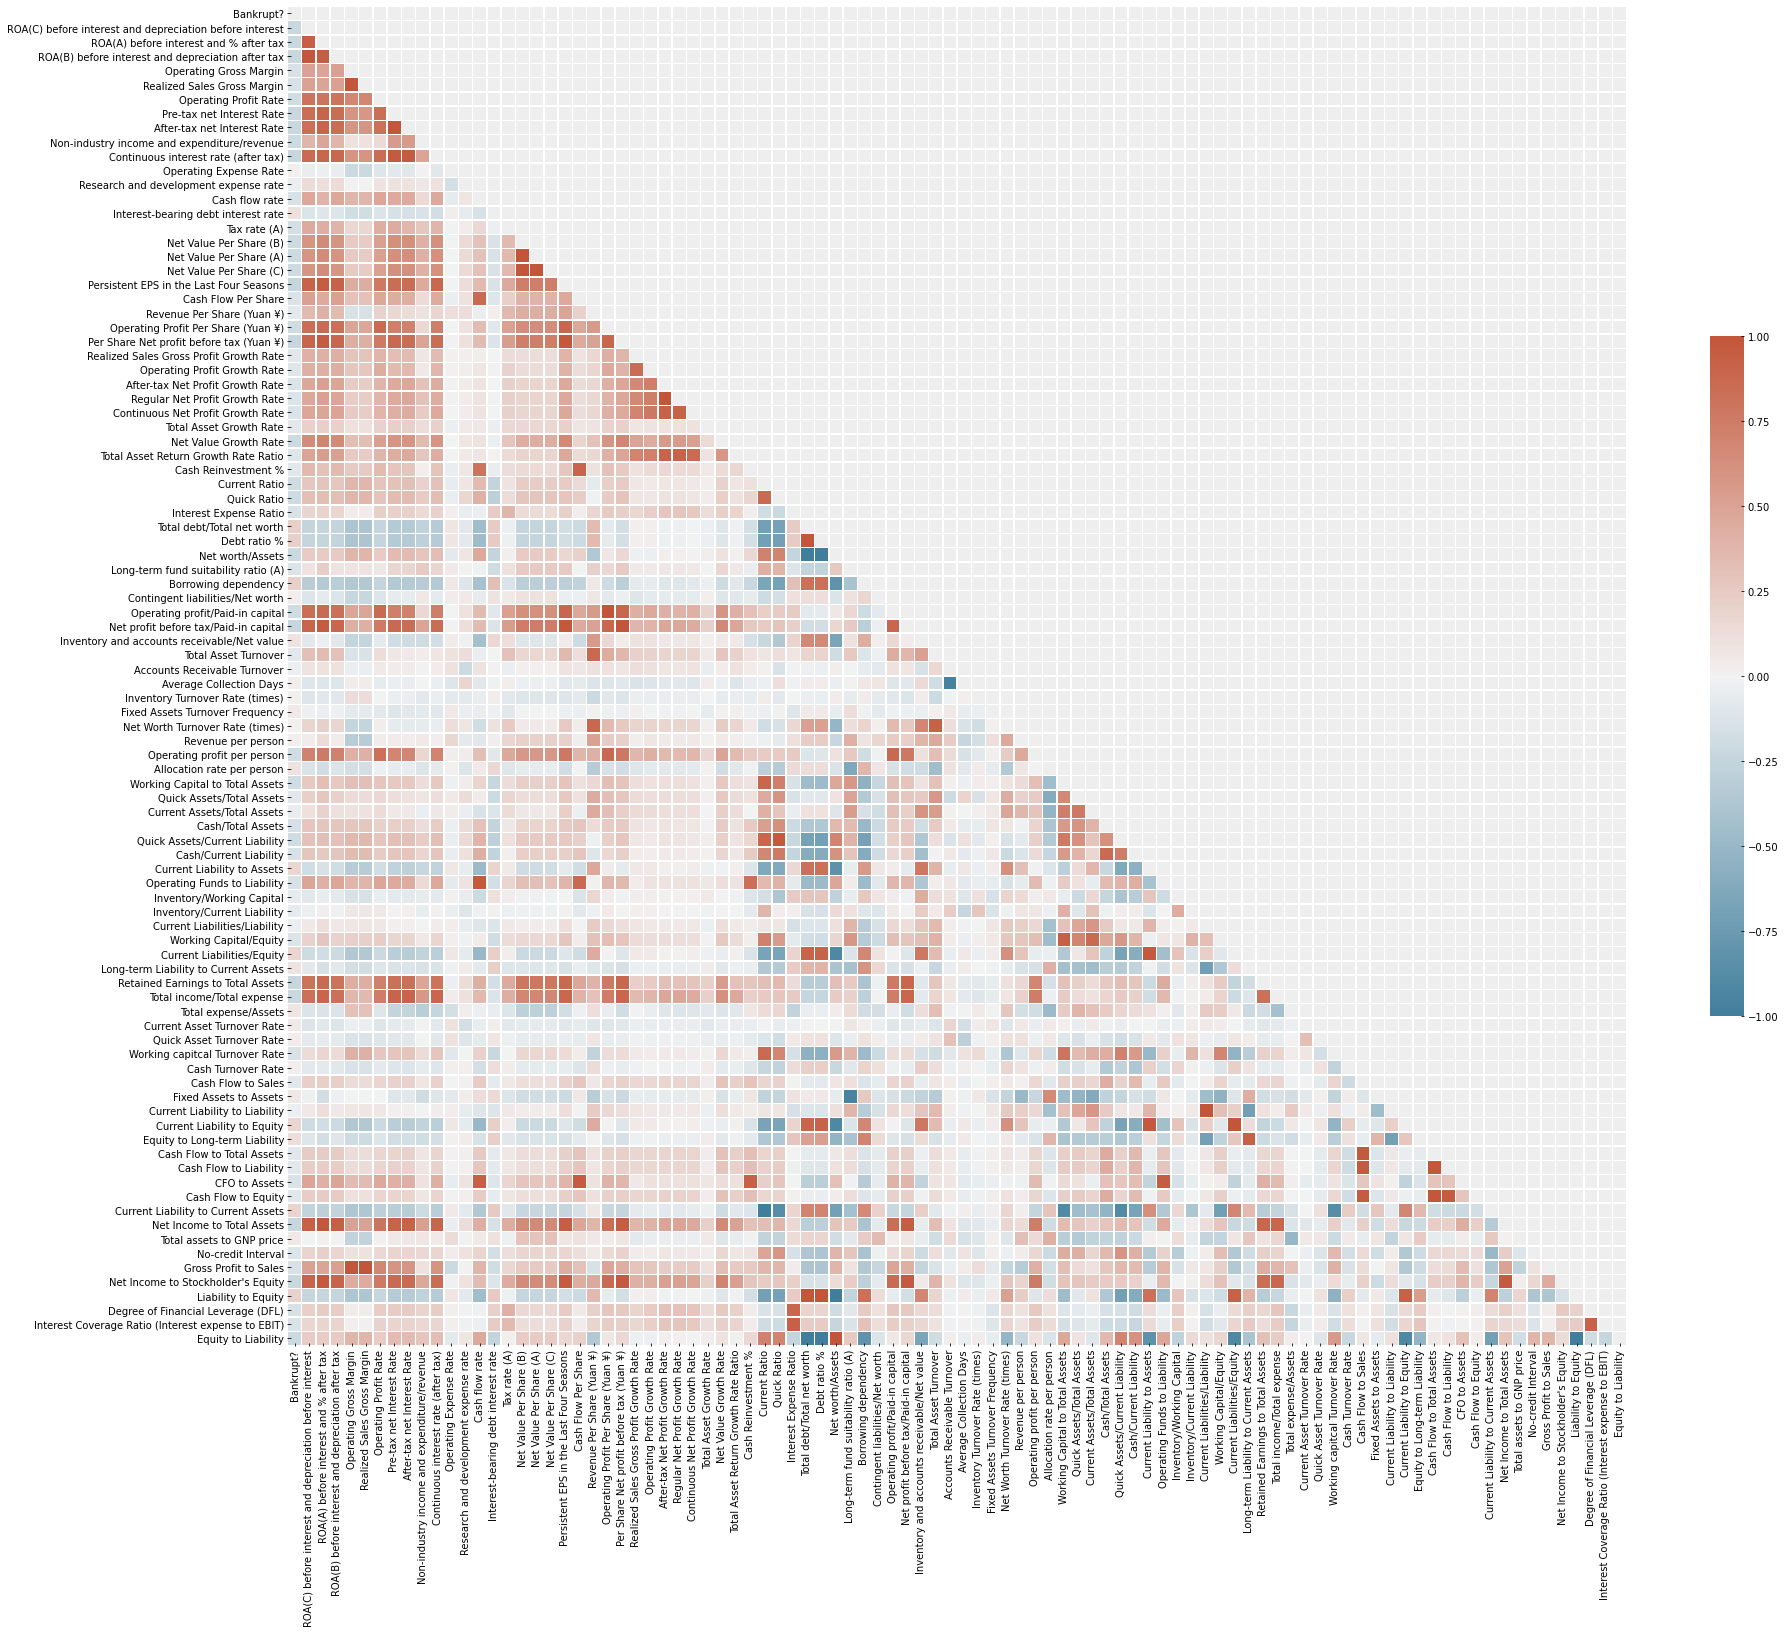

In [16]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Outlier detection:

Let's split the dataset into two part:  
One for the 0 and an other for 1 of target 

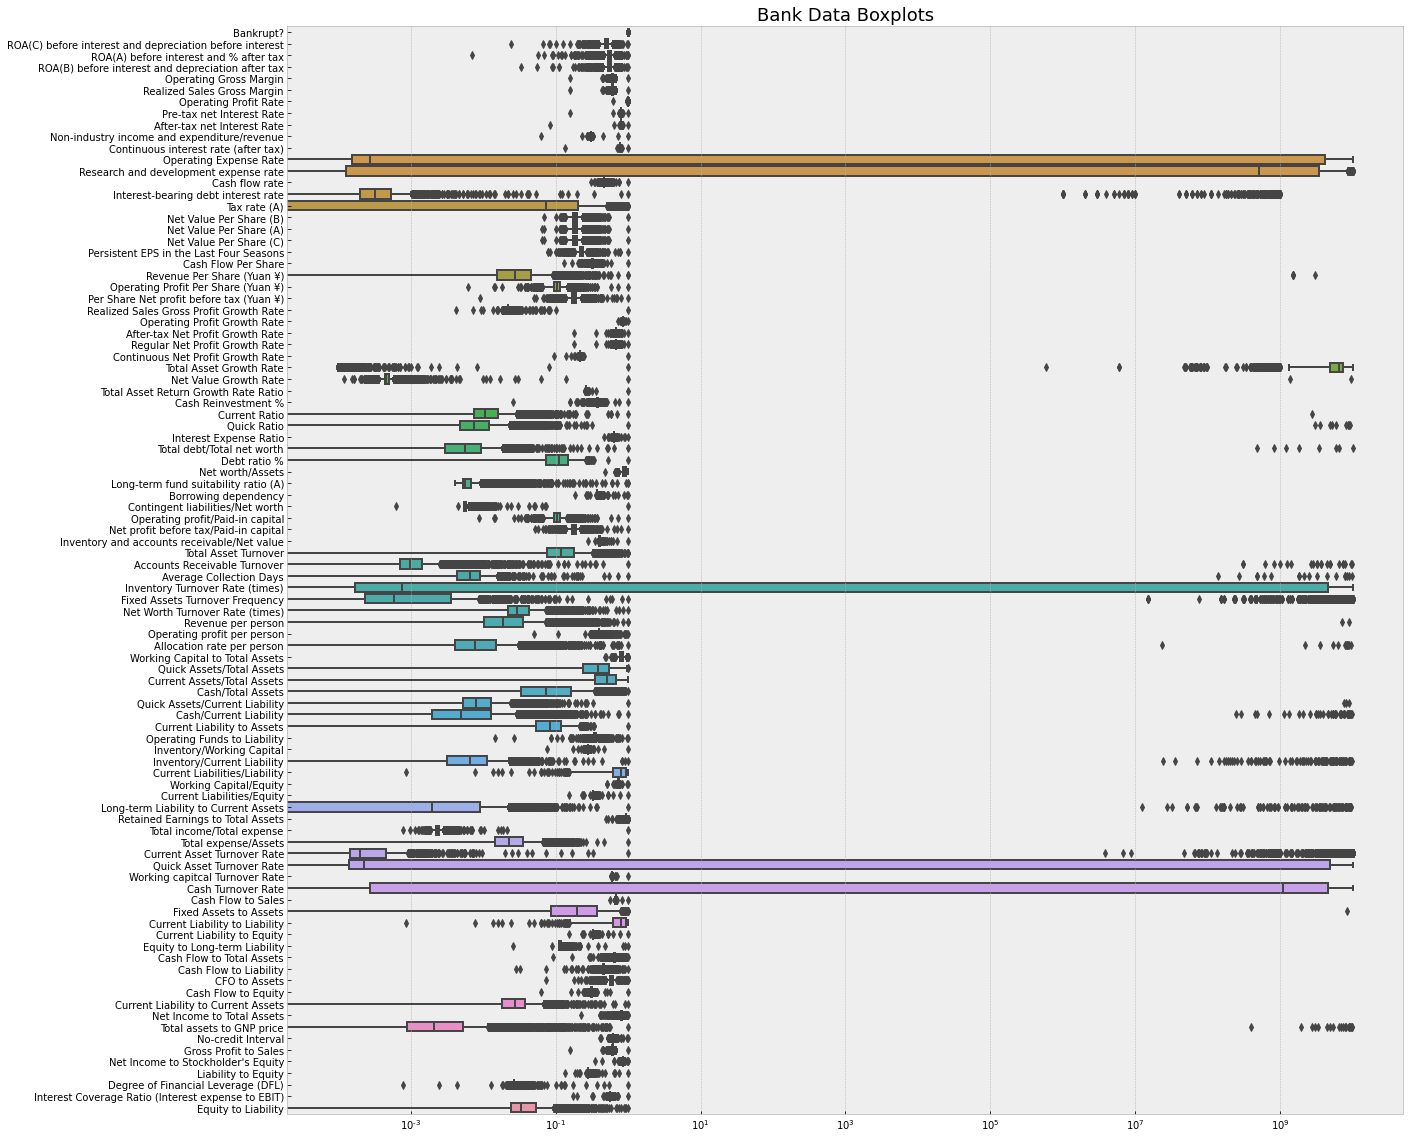

In [17]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()